# RtSVD Test

WNixalo 2018/3/8

Testing out some R-SVD on a burst of photos. From [Unit 3 Lecture 4](https://youtu.be/Ys8R2nUTOAk?list=PLtmWHNX-gukIc92m1K0P6bIOnZb-mg0hY&t=1994) of Fastai's [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.

Photos were taken by me at breakfast. The steadier your hand and the more photos you have, the better. May need more work to get color photos working.

---

## 1. Setup

In [2]:
## Imports
%matplotlib inline

import cv2
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import os

In [68]:
## Loading Images from Disk
images_raw = [cv2.imread("data/burst_photos/"+impath) 
              for impath in os.listdir("data/burst_photos/") 
              if impath != '.DS_Store']

images_raw[0].shape

(3024, 3024, 3)

In [69]:
## Converting Color and Resizing
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images_raw]  # color
images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_raw]  # gray
images = [cv2.resize(img, (400,400)) for img in images]

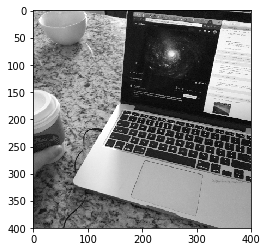

In [109]:
## Sample Image in Grayscale
# plt.figure(figsize=(12,12))
plt.imshow(images[0], cmap='gray');

## 2. Randomized Truncated Singular Value Decomposition

In [73]:
## Stack Images into 1 Matrix
M = np.vstack((img.flatten() for img in images)).T

In [74]:
M.shape

(160000, 40)

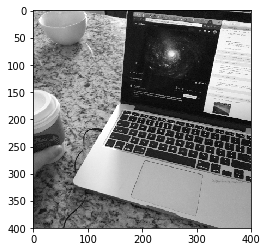

In [110]:
## Displaying a reassembled image from the Matrix
# plt.figure(figsize=(10,10))
# plt.imshow(np.reshape(M[:,0], (400,400,3)));  # color
plt.imshow(np.reshape(M[:,0], (400,400)), cmap='gray');  # gray

In [95]:
U, Σ, Vt = decomposition.randomized_svd(M, 1)

In [96]:
SVD_Matrix = U @ np.diag(Σ) @ Vt

In [97]:
SVD_Matrix.shape

(160000, 40)

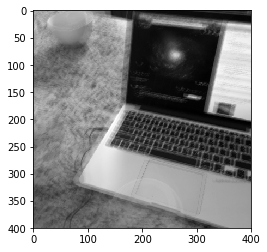

In [113]:
idx = 0
# SVD_image = np.reshape(SVD_Matrix[:,idx], (400,400,3))  # color
SVD_image = np.reshape(SVD_Matrix[:,idx], (400,400))  # gray

# plt.figure(figsize=(12,12))
plt.imshow(SVD_image, cmap='gray');

## 3. Demo

In [104]:
def show_random_image_pair(Matrix, SVD_Matrix):
    n = Matrix.shape[-1]
    idx = np.random.randint(0,n)
    dims = (400,400)  # (400,400,3) for color
    
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(Matrix[:,idx], dims), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(SVD_Matrix[:,idx], dims), cmap='gray')

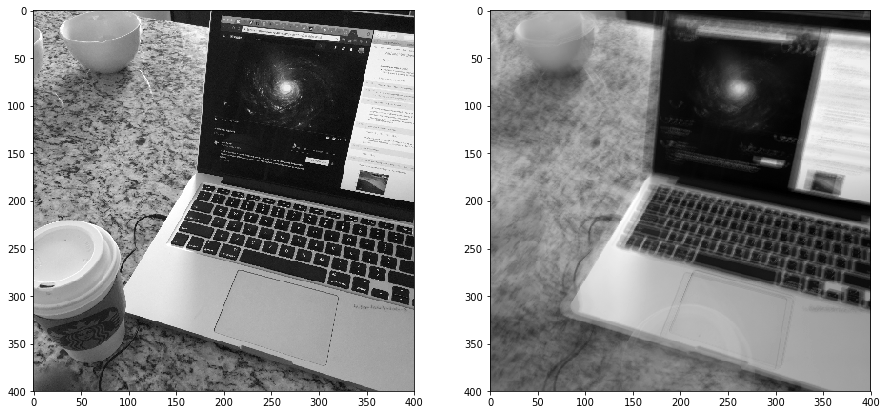

In [105]:
show_random_image_pair(M, SVD_Matrix)

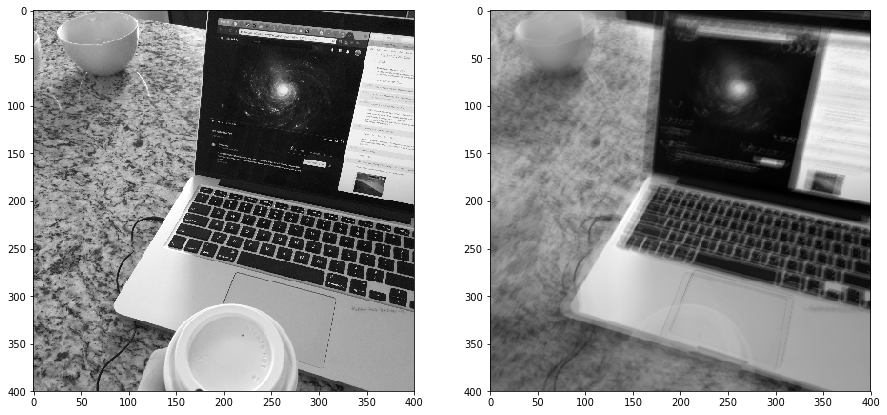

In [106]:
show_random_image_pair(M, SVD_Matrix)

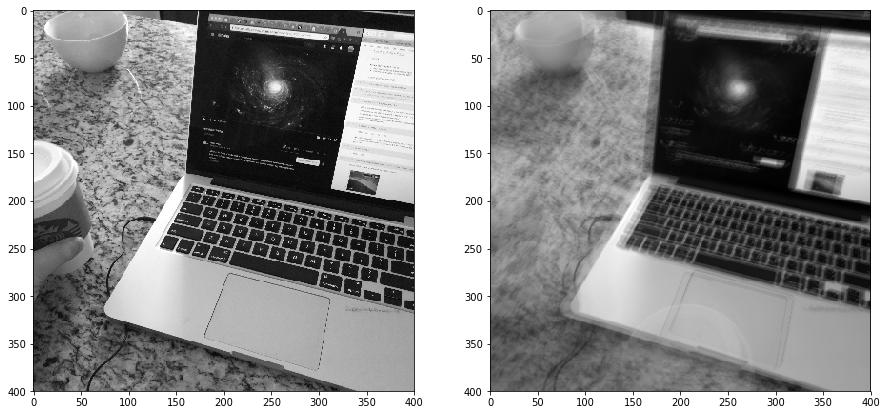

In [107]:
show_random_image_pair(M, SVD_Matrix)

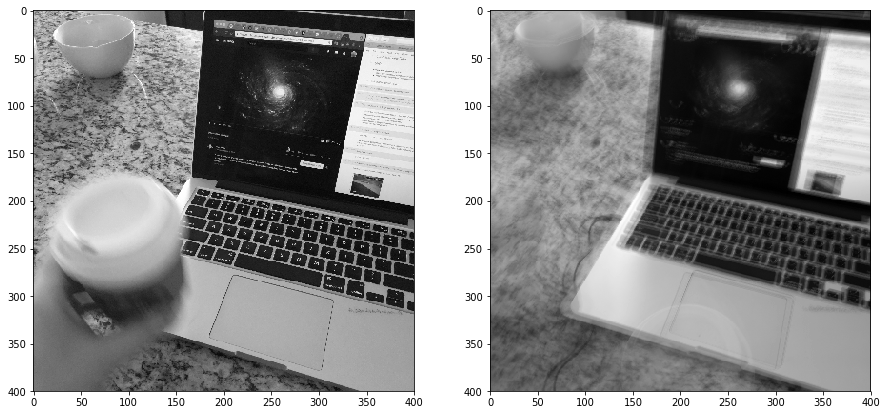

In [108]:
show_random_image_pair(M, SVD_Matrix)

---

### Helpful links:

Condtls in List Comprehensions:
* https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension

Plotting:
* https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
* https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
* https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

Exporting Burst Photos iOS:
* https://discussions.apple.com/thread/7599261